## Import Libraries

In [10]:
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [9]:
headers = {"<insert key here"}
endpoint = "https://api.yelp.com/v3/businesses/search"

## Creating a Function that Combines API Requests into a DataFrame 
Most APIs only return a limited number of results, so you need to make multiple requests to get beyond the limit

Try: *Can turn parameters into a variable outside of the function. 

In [19]:
def get_data(num_of_pages, location):
    pages = range(num_of_pages)
    param_dic = {}
    offset = 0
    dataset = pd.DataFrame() 
    for page in pages:
        import requests
        if page == 0:
            param_dic[page] = {
            "location": str(location),
            "attribute": "hot_and_new",
            "limit": "50"
            }
        else:
            offset = offset + 50
            param_dic[page] = {
                "location": str(location),
                "attribute": "hot_and_new",
                "limit": "50",
                "offset": str(offset)
            }
        request = requests.get(url = endpoint, params = param_dic[page], headers = headers)
        data = request.json()["businesses"]
        dataframe = pd.DataFrame.from_dict(data)
        dataset = pd.concat([dataset, dataframe])    
    dataset.reset_index(drop = True, inplace = True)
    return dataset

In [82]:
dataset = get_data(10, "New York")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             500 non-null    object 
 1   alias          500 non-null    object 
 2   name           500 non-null    object 
 3   image_url      500 non-null    object 
 4   is_closed      500 non-null    bool   
 5   url            500 non-null    object 
 6   review_count   500 non-null    int64  
 7   categories     500 non-null    object 
 8   rating         500 non-null    float64
 9   coordinates    500 non-null    object 
 10  transactions   500 non-null    object 
 11  price          477 non-null    object 
 12  location       500 non-null    object 
 13  phone          500 non-null    object 
 14  display_phone  500 non-null    object 
 15  distance       500 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 59.2+ KB


In [23]:
dataset.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,zv_XJAQr9D3PNR5eHYhC5w,bar-la-grassa-minneapolis,Bar La Grassa,https://s3-media2.fl.yelpcdn.com/bphoto/SKbCky...,False,https://www.yelp.com/biz/bar-la-grassa-minneap...,1271,italian,4.5,"{'latitude': 44.98954, 'longitude': -93.278594}",[delivery],$$$,"{'address1': '800 Washington Ave N', 'address2...",+16123333837,(612) 333-3837,2821.099953
1,6vaAze9Fxuco249L3BhEdQ,112-eatery-minneapolis,112 Eatery,https://s3-media2.fl.yelpcdn.com/bphoto/6oZdXE...,False,https://www.yelp.com/biz/112-eatery-minneapoli...,1172,newamerican,4.5,"{'latitude': 44.982527, 'longitude': -93.271807}",[delivery],$$$,"{'address1': '112 N 3rd St', 'address2': None,...",+16123437696,(612) 343-7696,2385.264921
2,5s2sT8ux7og5XfK-180r2g,george-and-the-dragon-minneapolis,George & The Dragon,https://s3-media3.fl.yelpcdn.com/bphoto/u7Pn5-...,False,https://www.yelp.com/biz/george-and-the-dragon...,908,newamerican,4.5,"{'latitude': 44.912151, 'longitude': -93.290436}","[pickup, delivery]",$$,"{'address1': '813 W 50th St', 'address2': '', ...",+16122081047,(612) 208-1047,5941.642856
3,5olLs-K-_k_rWrrNLjvy0w,spoon-and-stable-minneapolis-4,Spoon and Stable,https://s3-media2.fl.yelpcdn.com/bphoto/QaDSlg...,False,https://www.yelp.com/biz/spoon-and-stable-minn...,915,newamerican,4.5,"{'latitude': 44.9854892917291, 'longitude': -9...",[delivery],$$$,"{'address1': '211 N 1st St', 'address2': '', '...",+16122249850,(612) 224-9850,2755.624242
4,g7bbpP7x5KAc33i7pgOkLA,hells-kitchen-minneapolis,Hell's Kitchen,https://s3-media2.fl.yelpcdn.com/bphoto/-OhWXy...,False,https://www.yelp.com/biz/hells-kitchen-minneap...,2370,newamerican,4.0,"{'latitude': 44.97460605855, 'longitude': -93....","[pickup, delivery]",$$,"{'address1': '80 S 9th St', 'address2': None, ...",+16123324700,(612) 332-4700,1721.876448


## Analysis and Visualization(in progress)

In [34]:
dataset["review_count"].describe()

count     250.000000
mean      357.132000
std       284.313579
min        50.000000
25%       171.250000
50%       281.500000
75%       422.750000
max      2372.000000
Name: review_count, dtype: float64

Text(0.5, 1.0, 'KDE Plot of Restaurants by Review Count')

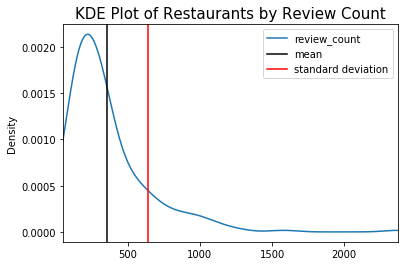

In [10]:
dataset["review_count"].plot.kde(xlim = (dataset['review_count'].min(),
                                    dataset['review_count'].max(),
                                    )
                            )
st_dev = dataset['review_count'].std(ddof = 0)
mean = dataset['review_count'].mean()
plt.axvline(mean, color = 'Black', label = 'mean')
plt.axvline(mean + st_dev, color = 'Red', label = 'standard deviation')
plt.legend()
plt.title("KDE Plot of Restaurants by Review Count", fontsize = 15)

***
Data is right skewed, with about 75% of restaurants having 425 reviews or less. Which is surprising, as from my plethora of experience eating out and browsing Yelp, it seems a lot more restaurants have more than 425 reviews than I was expecting. This might be a result from because of the parameter "hot and new". Either way, let's dig into this. 
***

Text(0.5, 1.0, 'Strip Plot with Price Subgroup')

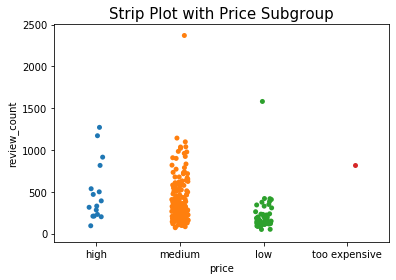

In [5]:
dataset['price'] = dataset['price'].str.replace('\$\$\$\$','too expensive')
dataset['price'] = dataset['price'].str.replace('\$\$\$','high')
dataset['price'] = dataset['price'].str.replace('\$\$','medium')
dataset['price'] = dataset['price'].str.replace('\$','low')

sns.stripplot(x = 'price', y = 'review_count', data = dataset, jitter = True)
plt.title("Strip Plot with Price Subgroup", fontsize = 15)

This was a great read. You might already know this, but this article clearly lays out what kind of tests you should think about when looking for relationships and correlation between continuous/continuous, continuous/categorical, categorical/categorical data. 

https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365 

Seems like alot of the cheaper restaurants actually have less reviews than some of the more expensive restaurants. This seems odd? Perhaps again it has to do with the parameter. Let's split it into more categories. 

In [7]:
y = pd.crosstab(dataset["rating"], dataset["price"], values = dataset["review_count"], aggfunc = "mean").round()
y

price,high,low,medium,too expensive
rating,,,,
3.5,NaN,NaN,484.0,NaN
4.0,369.0,282.0,389.0,826.0
4.5,708.0,175.0,337.0,NaN
5.0,NaN,126.0,NaN,NaN


if there were no null values, we'd be able to generate a chi-squared and p-value. I could remove them but we'd have very little data left! Let's just do some correlation analysis on price and rating. Remember the more data you pull the more accurate it will be!

In [11]:
x = pd.crosstab(dataset["rating"], dataset["price"])
x

price,high,low,medium,too expensive
rating,,,,
3.5,0,0,27,0
4.0,10,22,104,1
4.5,6,22,46,0
5.0,0,1,0,0


In [30]:
chisq_value, pvalue, df, expected = chi2_contingency(x)
print("x2 = ", chisq_value, "p-value = ", pvalue,"df = ", df)

x2 =  21.398423441999462 p-value =  0.01099414025767072 df =  9


Seems like there could be a statistically significant relationship between price and rating. I know we only pulled 150 values so this might not be very accurate.

To Do:
1. Repull data with more values. 
2. Planning to see what types of cuisines tend to get more reviews and higher ratings(by city)

Clean Category Column

In [83]:
def get_cat(lis):
    return lis[0]["alias"]
dataset["categories"] = dataset["categories"].apply(get_cat)

In [84]:
established_locations = dataset[dataset["review_count"] > 200]
cat_ratings = established_locations[["categories", "rating", "review_count"]].groupby("categories").mean()
cat_ratings["value_counts"] = established_locations["categories"].value_counts()

In [77]:
vancouver = cat_ratings.sort_values("value_counts", ascending = False).head(10)

In [85]:
new_york = cat_ratings.sort_values("value_counts", ascending = False).head(10)

In [81]:
minneapolis = cat_ratings.sort_values("value_counts", ascending = False).head(10)

In [86]:
print(vancouver, new_york, minneapolis)

                    rating  review_count  value_counts
categories                                            
japanese          3.934783    468.217391            23
seafood           3.825000    441.250000            20
newcanadian       3.906250    498.437500            16
italian           3.866667    345.200000            15
ramen             3.875000    428.833333            12
breakfast_brunch  3.954545    609.272727            11
coffee            4.100000    291.900000            10
mexican           4.111111    406.333333             9
chinese           3.750000    401.000000             8
icecream          4.071429    312.428571             7                rating  review_count  value_counts
categories                                       
newamerican  4.093750   1602.750000            32
italian      4.133333   1626.633333            30
japanese     4.120690   1248.275862            29
bakeries     4.206897   1895.448276            29
pizza        4.155172   1986.379310     

Try: all the notes in your data visualization stats

In [22]:
x = [1,2,3]
np.average(x, weights = (.5,.25,.25))

1.75